# Pips necesarios

In [ ]:
!pip install qiskit qiskit-aer matplotlib pylatexenc



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c8ffbcb2a6b62858158682771efd8565c7095a4c277142b4d26cdea22a9287aa
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


# 3 Qubit QFT Demostration

Base computacional |010⟩:


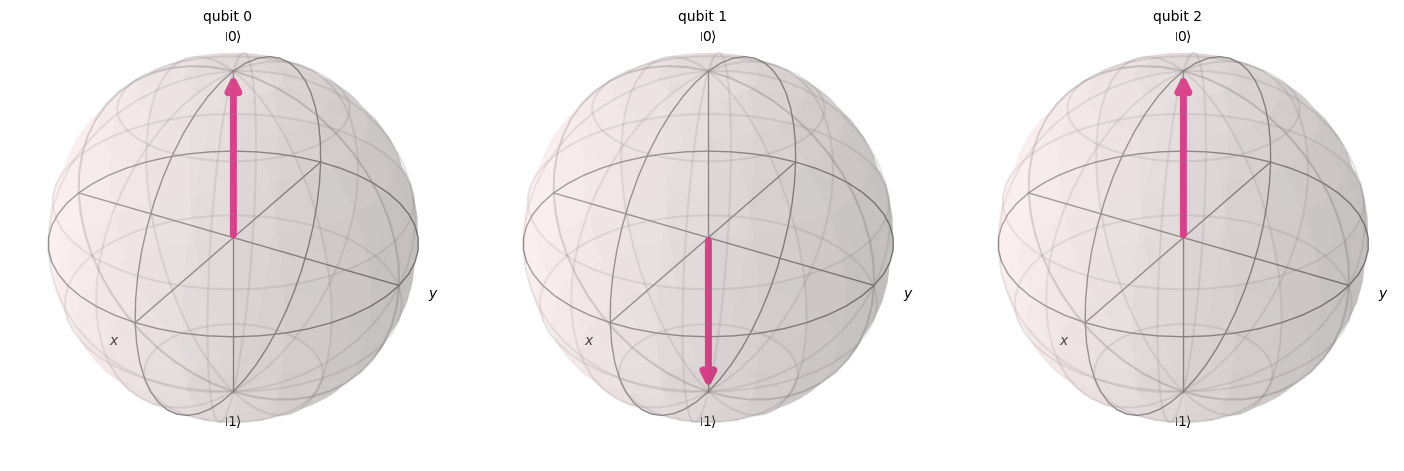


Base de Fourier tras aplicar QFT:


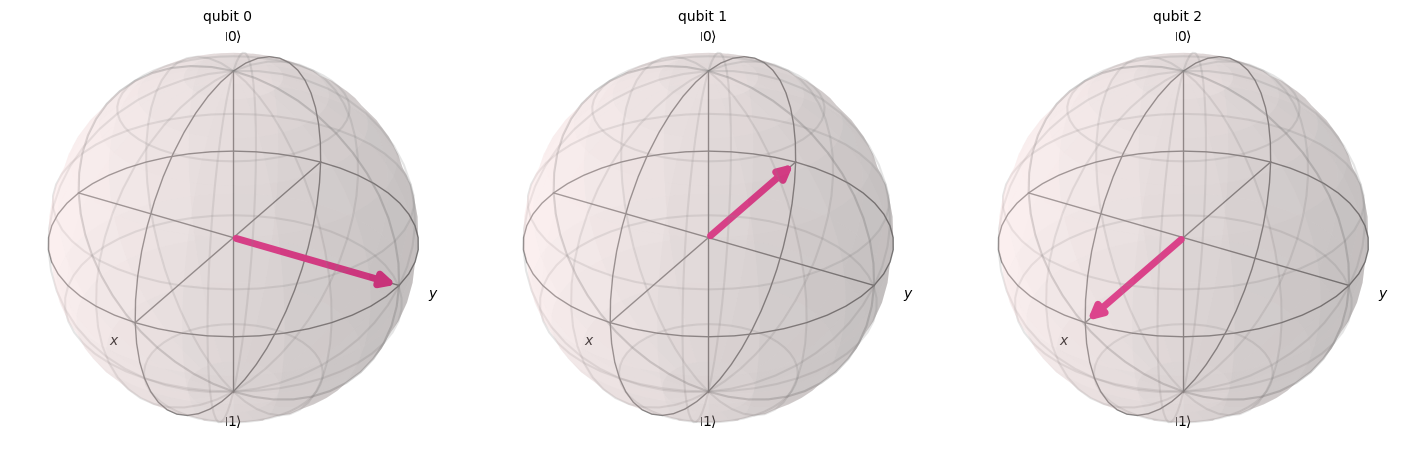

In [ ]:
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the initial state
initial_state = '010'

# Create a quantum circuit
qc = QuantumCircuit(len(initial_state))
qc.initialize(Statevector.from_label(initial_state).data, qc.qubits[::-1])

# Display the computational basis
print(f"Base computacional |{initial_state}⟩:")
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

# Apply the Quantum Fourier Transform (QFT)
print("\nBase de Fourier tras aplicar QFT:")
qft_gate = QFT(len(initial_state), do_swaps=True)
qc.append(qft_gate, qc.qubits)

# Display the result in the Fourier basis
display(plot_bloch_multivector(Statevector.from_instruction(qc).data))

# QFT 3 Qubits

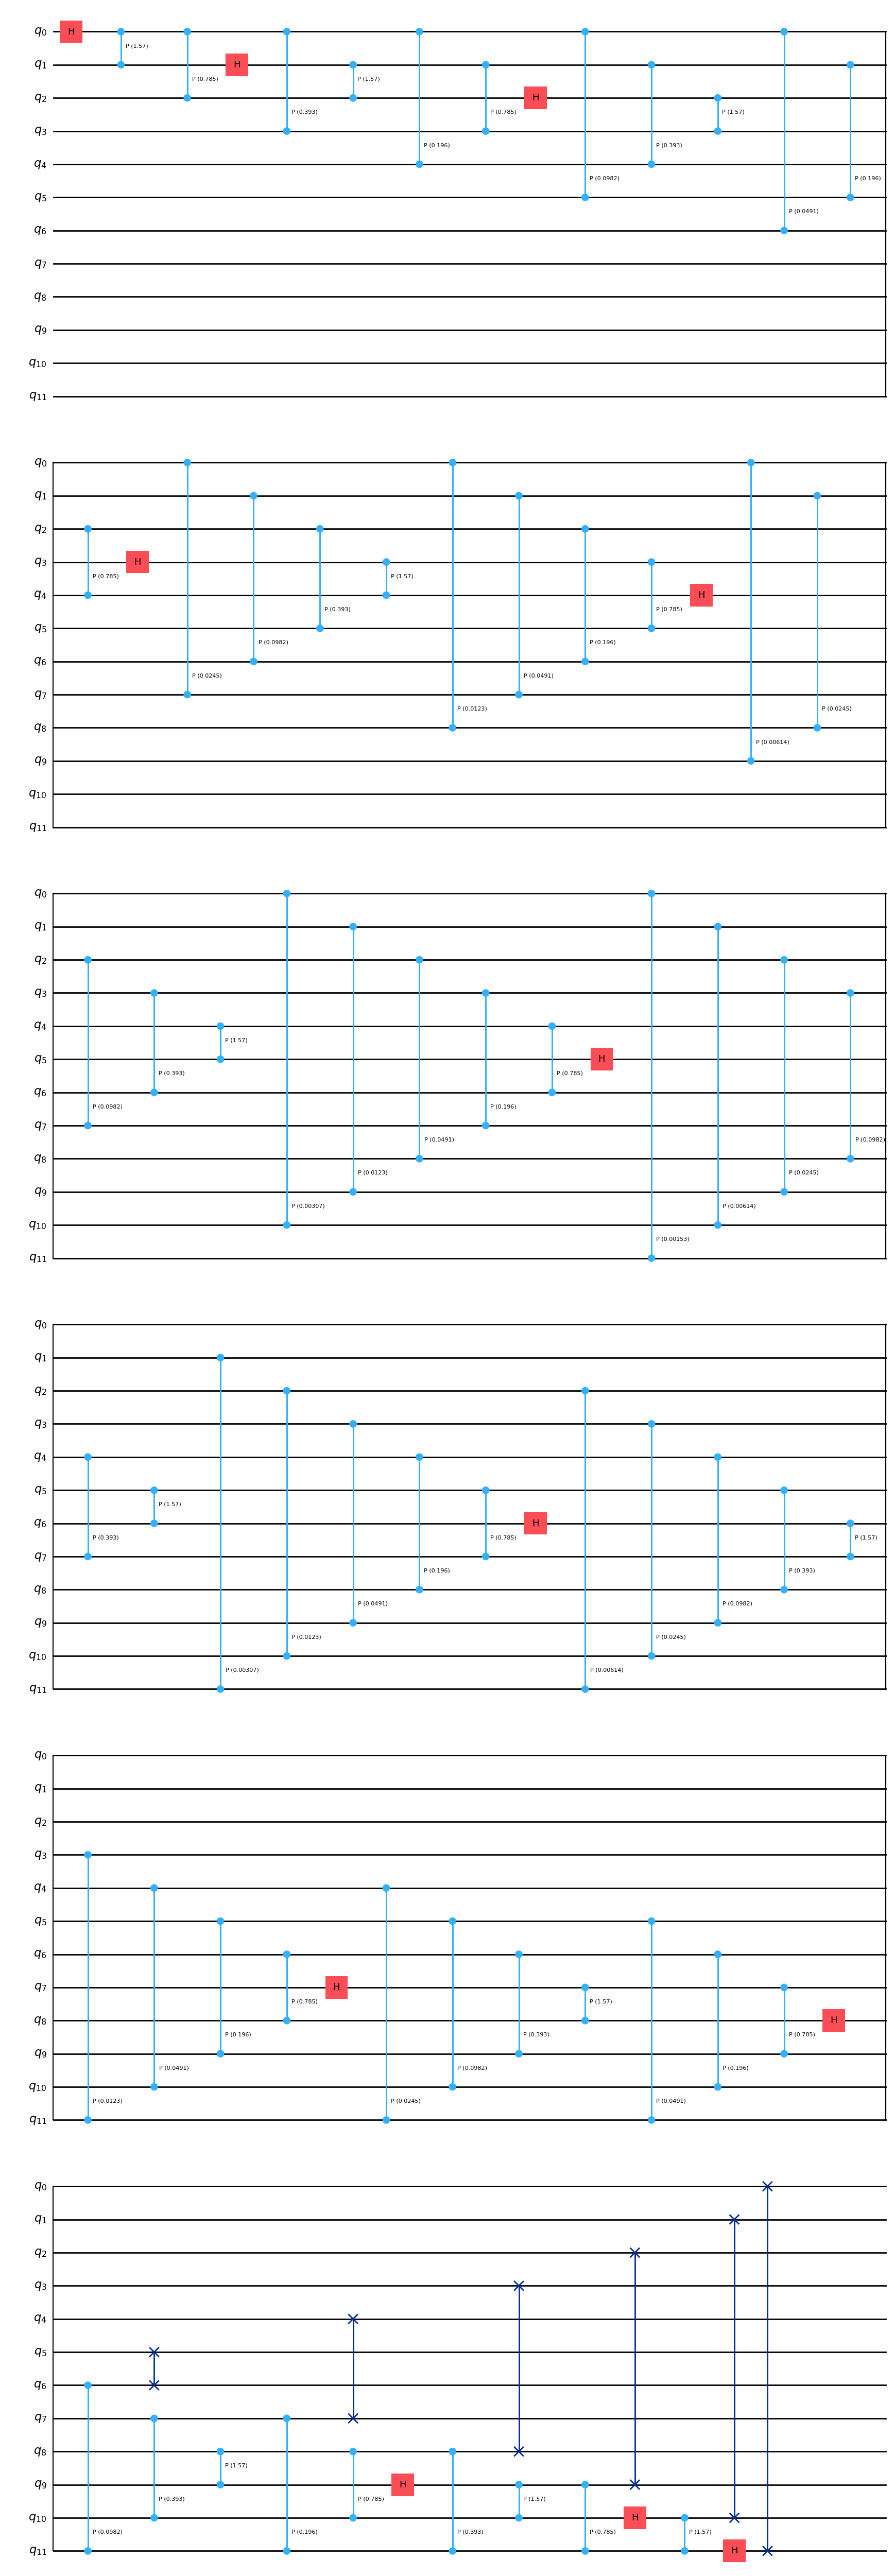

In [ ]:
from qiskit import QuantumCircuit

def qft(n):
    qc = QuantumCircuit(n)
    for k in range(n):
        qc.h(k)  # Aplica la puerta H al qubit k
        for j in range(k + 1, n):
            angle = 2 * 3.14159 / (2 ** (j - k + 1))
            qc.cp(angle, j, k)  # Aplica la puerta UROTm como una fase controlada
    for i in range(n // 2):
        qc.swap(i, n - i - 1)  # Intercambia los qubits para invertir el orden
    return qc

# Crear el circuito QFT para 4 qubits
qft_circuit = qft(12)
qft_circuit.draw('mpl')

# QPE para la puerta de Pauli-Z

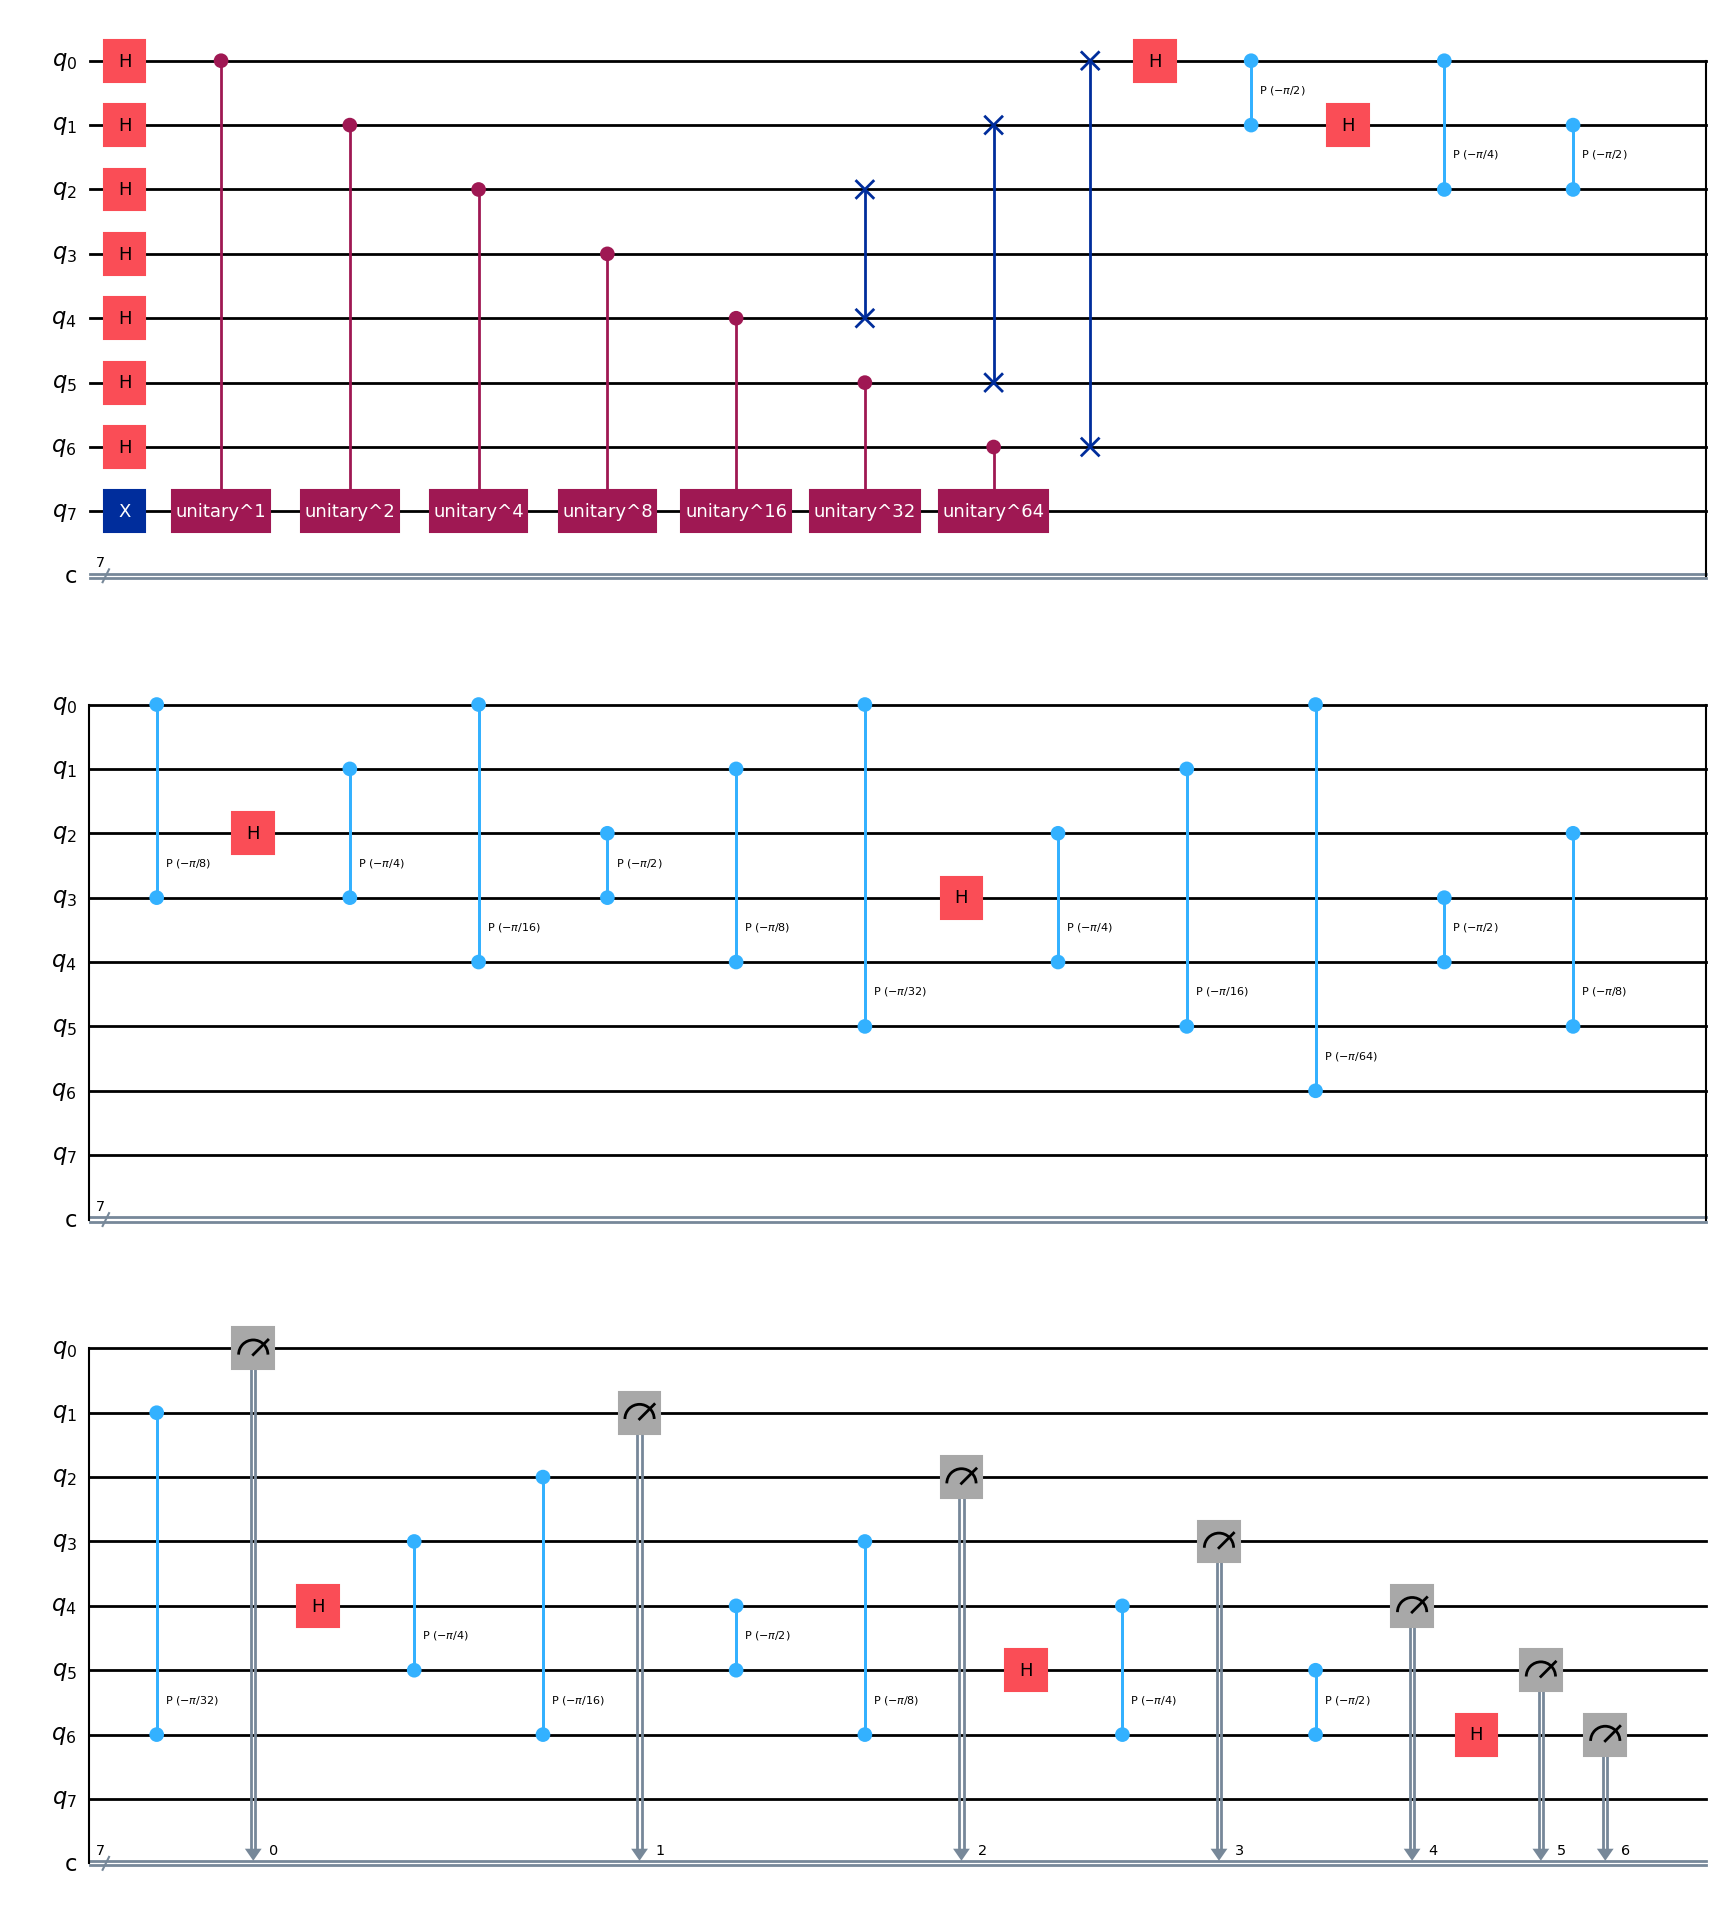

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate  # Corrección en la importación
import numpy as np

# Número de qubits para la estimación de fase
n = 7  # qubits contadores

# Definir la matriz de Pauli-Z manualmente
Z_matrix = np.array([[1, 0], [0, -1]])  # Matriz de Pauli-Z
U_gate = UnitaryGate(Z_matrix, label="U")  # Crear la puerta unitaria con etiqueta "U"

# Circuito QPE para la matriz de Pauli-Z con U definido
def qpe_pauli_z(n):
    qc = QuantumCircuit(n + 1, n)

    # Inicializar el último qubit en |1>
    qc.x(n)

    # Aplicar Hadamard en los qubits contadores
    for i in range(n):
        qc.h(i)

    # Aplicar las potencias controladas del operador U
    for i in range(n):
        power = 2 ** i  # 2^i
        controlled_U = U_gate.power(power).control(1)  # U^(2^i) con control
        qc.append(controlled_U, [i, n])  # Aplicar el operador controlado

    # Aplicar la transformada de Fourier inversa
    for i in range(n // 2):
        qc.swap(i, n - i - 1)

    for j in range(n):
        for k in range(j):
            qc.cp(-np.pi / float(2 ** (j - k)), k, j)
        qc.h(j)

    # Medir los qubits contadores
    qc.measure(range(n), range(n))

    return qc

# Crear el circuito
qpe_circuit = qpe_pauli_z(n)

# Mostrar el circuito cuántico con el operador U definido
qpe_circuit.draw('mpl')


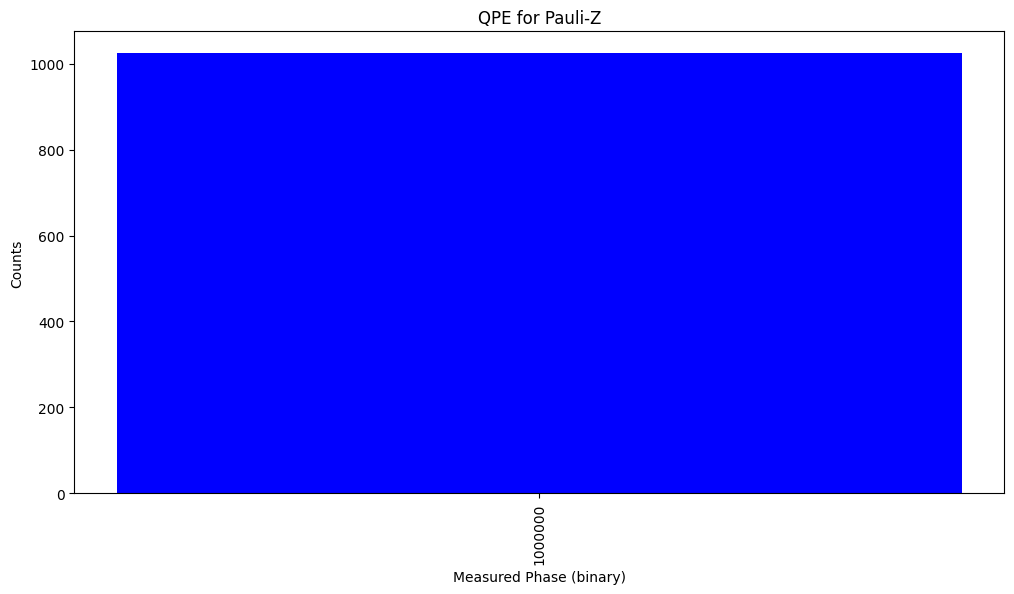

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import transpile
import matplotlib.pyplot as plt

# Ejecutar en el simulador
simulator = AerSimulator()

# Transpilar el circuito
transpiled_circuit = transpile(qpe_circuit, simulator, optimization_level=1)

# Simulación
job = simulator.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.bar(counts.keys(), counts.values(), color='blue')
plt.xlabel("Measured Phase (binary)")
plt.ylabel("Counts")
plt.title("QPE for Pauli-Z")
plt.xticks(rotation=90)
plt.show()


# HSP Simon y Shor


{'000': 1266, '001': 1246, '100': 1198, '101': 1314}


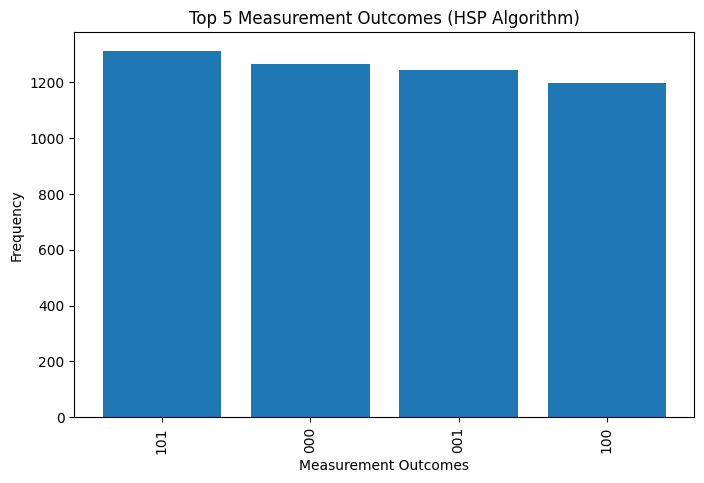

In [ ]:
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import QFT
import numpy as np
from qiskit_aer import AerSimulator
from qiskit import transpile
import matplotlib.pyplot as plt

def hsp_circuit(group_size, oracle_gate, apply_qft=True):
    """
    Constructs a general HSP circuit.

    Parameters:
    - group_size (int): Number of qubits representing the group elements.
    - oracle_gate (Gate): Gate representing the oracle function.
    - apply_qft (bool): Whether to apply Quantum Fourier Transform (QFT) or Hadamard gates in the second step.

    Returns:
    - QuantumCircuit: The HSP quantum circuit.
    """
    total_qubits = group_size * 2  # Group register + target register
    qc = QuantumCircuit(total_qubits, group_size)  # Include classical bits for measurement

    # Step 1: Apply Hadamard to group register (first group_size qubits)
    for i in range(group_size):
        qc.h(i)

    # Step 2: Apply the function oracle (unitary gate)
    qc.append(oracle_gate, range(total_qubits))  # Ensure correct qubit mapping

    # Step 3: Apply QFT or Hadamard depending on the problem
    if apply_qft:
        qft_circ = QFT(num_qubits=group_size, do_swaps=True).inverse()
        qc.append(qft_circ.to_gate(), range(group_size))
    else:
        for i in range(group_size):
            qc.h(i)

    # Step 4: Measurement
    qc.measure(range(group_size), range(group_size))

    return qc

def modular_exponentiation(base, N, group_size):
    """
    Constructs a modular exponentiation oracle for Shor's algorithm.

    Parameters:
    - base (int): Base of the modular exponentiation.
    - N (int): Modulus for the operation.
    - group_size (int): Number of qubits in the group register.

    Returns:
    - QuantumCircuit: Circuit that performs modular exponentiation.
    """
    qc = QuantumCircuit(group_size * 2, name="ModExp")

    # Example modular exponentiation as placeholder logic
    for i in range(group_size):
        qc.cx(i, group_size + i)

    return qc.to_gate()  # Return as a gate

def simon_oracle(n, secret_string):
    """
    Constructs a Simon oracle as a QuantumCircuit.

    Parameters:
    - n (int): Number of qubits in the input (group size).
    - secret_string (str): Secret binary string s that satisfies f(x) = f(x ⊕ s).

    Returns:
    - Gate: Unitary gate representing the Simon oracle.
    """
    oracle = QuantumCircuit(2 * n, name="Oracle")

    # Implement the oracle based on the secret string
    for i, bit in enumerate(secret_string):
        if bit == '1':
            oracle.cx(i, n + i)  # Apply CNOT gates for bits corresponding to the secret

    return oracle.to_gate()  # Convert to a unitary gate

# Define parameters for Shor's problem (case a)
N = 35  # Number to factorize
a = 11  # Random base (co-prime with N)
group_size = int(np.ceil(np.log2(N))) + 1  # Number of qubits in the group register
oracle_gate = modular_exponentiation(a, N, group_size)  # Modular exponentiation oracle
apply_qft = True  # Use QFT for Shor's problem


# Uncomment the following lines to switch to Simon's problem (case b)
n = 3  # Number of qubits in the group register
secret_string = "101"  # Secret string for Simon's problem
group_size = n
oracle_gate = simon_oracle(n, secret_string)  # Simon oracle
apply_qft = False  # Use Hadamard gates for Simon's problem

# Generate the HSP circuit
hsp_circuit_general = hsp_circuit(group_size, oracle_gate, apply_qft)

# Visualize the quantum circuit
hsp_circuit_general.draw(output='mpl')

# Simulate and visualize
simulator = AerSimulator()
compiled_circuit = transpile(hsp_circuit_general, simulator)
job = simulator.run(compiled_circuit, shots=5024)
result = job.result()
counts = result.get_counts()
print(counts)

# Extract top 5 results
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
top_5_counts = dict(list(sorted_counts.items())[:5])

# Plot the top 5 results
plt.figure(figsize=(8, 5))
plt.bar(top_5_counts.keys(), top_5_counts.values())
plt.xlabel("Measurement Outcomes")
plt.ylabel("Frequency")
plt.title("Top 5 Measurement Outcomes (HSP Algorithm)")
plt.xticks(rotation=90)
plt.show()


Interpretación de los resultados Simon:

Los valores en el eje
𝑥
x (
000
,
101
,
100
,
001
000,101,100,001) son vectores
𝑏
b que cumplen la condición:
𝑏
⋅
𝑠
=
0
m
o
d


2
b⋅s=0mod2
donde
𝑏
b es un resultado medido y
𝑠
s es el secreto que estamos buscando.
Construir un sistema de ecuaciones mod 2:

Cada medición
𝑏
b proporciona una ecuación lineal en mod 2 que es ortogonal al secreto
𝑠
s.
Para los resultados del histograma (
000
,
101
,
100
,
001
000,101,100,001):
000
000:
0
⋅
𝑠
0
+
0
⋅
𝑠
1
+
0
⋅
𝑠
2
=
0
m
o
d


2
0⋅s
0
​
 +0⋅s
1
​
 +0⋅s
2
​
 =0mod2 (trivial, no aporta información).
101
101:
1
⋅
𝑠
0
+
0
⋅
𝑠
1
+
1
⋅
𝑠
2
=
0
m
o
d


2
1⋅s
0
​
 +0⋅s
1
​
 +1⋅s
2
​
 =0mod2.
100
100:
1
⋅
𝑠
0
+
0
⋅
𝑠
1
+
0
⋅
𝑠
2
=
0
m
o
d


2
1⋅s
0
​
 +0⋅s
1
​
 +0⋅s
2
​
 =0mod2.
001
001:
0
⋅
𝑠
0
+
0
⋅
𝑠
1
+
1
⋅
𝑠
2
=
0
m
o
d


2
0⋅s
0
​
 +0⋅s
1
​
 +1⋅s
2
​
 =0mod2.
Resolver el sistema de ecuaciones:

Usando las ecuaciones (sin incluir el
000
000 trivial):
𝑠
0
+
𝑠
2
=
0
m
o
d


2
s
0
​
 +s
2
​
 =0mod2

⟹

𝑠
0
=
𝑠
2
⟹s
0
​
 =s
2
​
 ,
𝑠
0
=
0
m
o
d


2
s
0
​
 =0mod2,
𝑠
2
=
0
m
o
d


2
s
2
​
 =0mod2.
El sistema sugiere que el secreto es
𝑠
=
101
s=101.
Conclusión:

El algoritmo nos da suficiente información para determinar el secreto
𝑠
s. Cada medición válida contribuye a resolver el sistema mod 2, que al resolverse, produce el secreto.

***Complejidad computacional Simon***

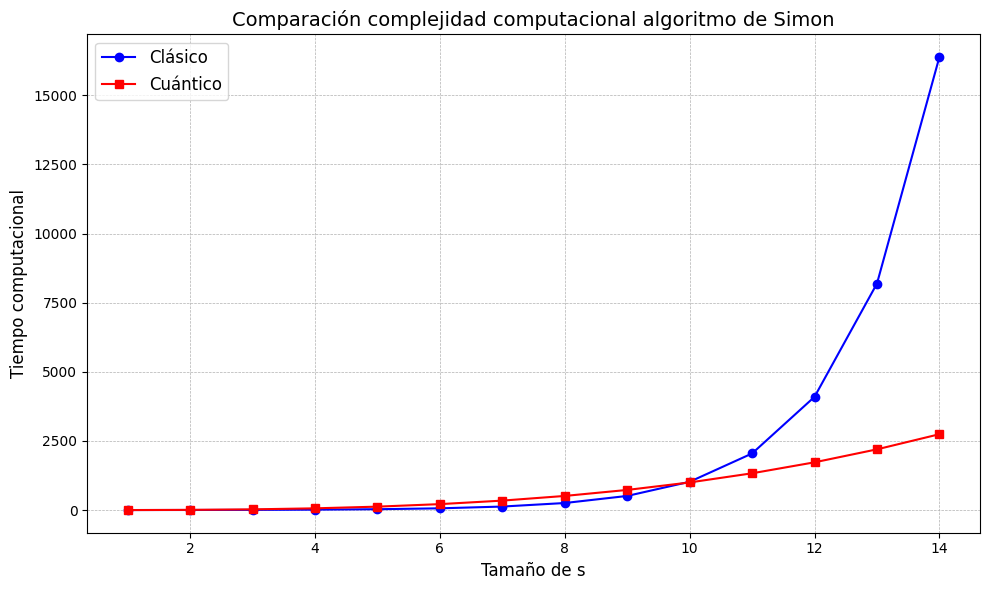

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de n
n = np.arange(1, 15)  # Desde 1 hasta 20

# Funciones
y1 = 2**(n)
y2 = n**3

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(n, y1, label=r'Clásico', marker='o', color='blue')
plt.plot(n, y2, label=r'Cuántico', marker='s', color='red')

# Configuración de la gráfica
plt.title('Comparación complejidad computacional algoritmo de Simon', fontsize=14)
plt.xlabel('Tamaño de s', fontsize=12)
plt.ylabel('Tiempo computacional', fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


***Complejidad computacional Shor***

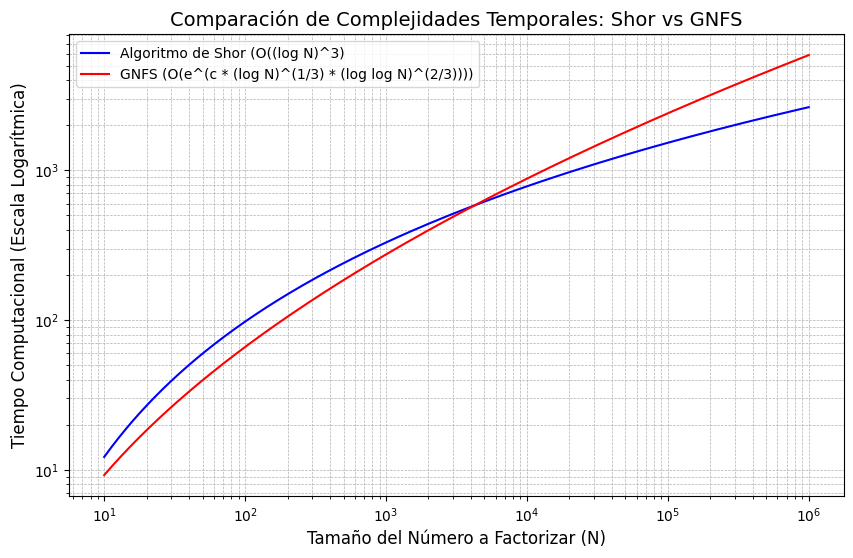

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de N (número a factorizar)
N_values = np.logspace(1, 6, 500)  # Valores de N desde 10^1 hasta 10^6

# Complejidad real del algoritmo de Shor: O((log N)^3)
shor_complexity = (np.log(N_values))**3

# Complejidad real del GNFS: O(e^(c * (log N)^(1/3) * (log log N)^(2/3)))
c = 1.9  # Constante más precisa según la literatura
gnfs_complexity = np.exp(c * (np.log(N_values))**(1/3) * (np.log(np.log(N_values)))**(2/3))

# Graficar las complejidades
plt.figure(figsize=(10, 6))
plt.plot(N_values, shor_complexity, label="Algoritmo de Shor (O((log N)^3)", color="blue")
plt.plot(N_values, gnfs_complexity, label="GNFS (O(e^(c * (log N)^(1/3) * (log log N)^(2/3))))", color="red")

# Configurar la gráfica
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Tamaño del Número a Factorizar (N)", fontsize=12)
plt.ylabel("Tiempo Computacional (Escala Logarítmica)", fontsize=12)
plt.title("Comparación de Complejidades Temporales: Shor vs GNFS", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Mostrar la gráfica
plt.show()

